In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt
import seaborn as sns



# Modeling & Accuracy Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

**Analyzing the dataframe**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/HighRadius/H2HBABBA2524.csv'
df = pd.read_csv(path)

In [ ]:
df.shape

(50000, 19)

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2020-01-14 00:00:00,2020.0,1.930344e+09,2019-12-31,20200102,20191231,20200115.0,USD,RV,1.0,NaN,471.56,20191231.0,NAH4,1.930344e+09,0
1,CA02,0140106408,WAL-M trust,2019-12-30 00:00:00,2019.0,2.960601e+09,2019-12-16,20191217,20191216,20191226.0,CAD,RV,1.0,NaN,53243.66,20191216.0,CA10,2.960601e+09,0
2,U001,0200707822,PUBLI foundation,2019-07-22 00:00:00,2019.0,1.929587e+09,2019-07-07,20190708,20190707,20190722.0,USD,RV,1.0,NaN,66232.61,20190707.0,NAA8,1.929587e+09,0
3,U001,0200792283,SYSCO in,2019-07-24 00:00:00,2019.0,1.929581e+09,2019-07-08,20190706,20190708,20190723.0,USD,RV,1.0,NaN,36608.73,20190708.0,NAA8,1.929581e+09,0
4,U001,0200782772,ASSOC G llc,NaN,2020.0,1.930725e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,NaN,31604.77,20200331.0,NAA8,1.930725e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S co,2019-09-26 00:00:00,2019.0,1.929850e+09,2019-09-10,20190909,20190910,20190925.0,USD,RV,1.0,NaN,15606.35,20190910.0,NAA8,1.929850e+09,0
49996,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930677e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,60420.82,20200320.0,NAH4,1.930677e+09,1
49997,U001,0200726979,BJ'S trust,NaN,2020.0,1.930858e+09,2020-05-05,20200504,20200505,20200520.0,USD,RV,1.0,NaN,61.69,20200505.0,NAA8,1.930858e+09,1
49998,U001,0200705742,DOT systems,2019-06-18 00:00:00,2019.0,1.929427e+09,2019-06-03,20190604,20190603,20190618.0,USD,RV,1.0,NaN,14673.09,20190603.0,NAA8,1.929427e+09,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2020-01-14 00:00:00,2020.0,1.930344e+09,2019-12-31,20200102,20191231,20200115.0,USD,RV,1.0,NaN,471.56,20191231.0,NAH4,1.930344e+09,0
1,CA02,0140106408,WAL-M trust,2019-12-30 00:00:00,2019.0,2.960601e+09,2019-12-16,20191217,20191216,20191226.0,CAD,RV,1.0,NaN,53243.66,20191216.0,CA10,2.960601e+09,0
2,U001,0200707822,PUBLI foundation,2019-07-22 00:00:00,2019.0,1.929587e+09,2019-07-07,20190708,20190707,20190722.0,USD,RV,1.0,NaN,66232.61,20190707.0,NAA8,1.929587e+09,0
3,U001,0200792283,SYSCO in,2019-07-24 00:00:00,2019.0,1.929581e+09,2019-07-08,20190706,20190708,20190723.0,USD,RV,1.0,NaN,36608.73,20190708.0,NAA8,1.929581e+09,0
4,U001,0200782772,ASSOC G llc,NaN,2020.0,1.930725e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,NaN,31604.77,20200331.0,NAA8,1.930725e+09,1


In [ ]:
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200726979,BJ'S co,2019-09-26 00:00:00,2019.0,1.929850e+09,2019-09-10,20190909,20190910,20190925.0,USD,RV,1.0,NaN,15606.35,20190910.0,NAA8,1.929850e+09,0
49996,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930677e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,60420.82,20200320.0,NAH4,1.930677e+09,1
49997,U001,0200726979,BJ'S trust,NaN,2020.0,1.930858e+09,2020-05-05,20200504,20200505,20200520.0,USD,RV,1.0,NaN,61.69,20200505.0,NAA8,1.930858e+09,1
49998,U001,0200705742,DOT systems,2019-06-18 00:00:00,2019.0,1.929427e+09,2019-06-03,20190604,20190603,20190618.0,USD,RV,1.0,NaN,14673.09,20190603.0,NAA8,1.929427e+09,0
49999,CA02,0140104440,SO in,NaN,2020.0,2.960626e+09,2020-04-05,20200405,20200405,20200418.0,CAD,RV,1.0,NaN,266696.05,20200408.0,CA10,2.960626e+09,1


In [ ]:
df.nunique()

business_code                 5
cust_number                1419
name_customer              4195
clear_date                  401
buisness_year                 2
doc_id                    48800
posting_date                503
document_create_date        507
document_create_date.1      504
due_in_date                 549
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44306
baseline_create_date        506
cust_payment_terms           70
invoice_id                48797
isOpen                        2
dtype: int64

In [ ]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    3
isOpen                        0
dtype: int64

In [ ]:
df.duplicated().sum()

1200

In [ ]:
df=df.drop_duplicates(subset='invoice_id',keep='first')   #subset was taken as invoice_id because it had maximum number of null values. #actually because having duplicate invoice_id is kind of inappropriate.
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2020-01-14 00:00:00,2020.0,1.930344e+09,2019-12-31,20200102,20191231,20200115.0,USD,RV,1.0,NaN,471.56,20191231.0,NAH4,1.930344e+09,0
1,CA02,0140106408,WAL-M trust,2019-12-30 00:00:00,2019.0,2.960601e+09,2019-12-16,20191217,20191216,20191226.0,CAD,RV,1.0,NaN,53243.66,20191216.0,CA10,2.960601e+09,0
2,U001,0200707822,PUBLI foundation,2019-07-22 00:00:00,2019.0,1.929587e+09,2019-07-07,20190708,20190707,20190722.0,USD,RV,1.0,NaN,66232.61,20190707.0,NAA8,1.929587e+09,0
3,U001,0200792283,SYSCO in,2019-07-24 00:00:00,2019.0,1.929581e+09,2019-07-08,20190706,20190708,20190723.0,USD,RV,1.0,NaN,36608.73,20190708.0,NAA8,1.929581e+09,0
4,U001,0200782772,ASSOC G llc,NaN,2020.0,1.930725e+09,2020-03-31,20200331,20200331,20200415.0,USD,RV,1.0,NaN,31604.77,20200331.0,NAA8,1.930725e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200152991,JET in,2019-05-21 00:00:00,2019.0,1.929243e+09,2019-05-01,20190501,20190501,20190516.0,USD,RV,1.0,NaN,147.73,20190501.0,NAA8,1.929243e+09,0
49995,U001,0200726979,BJ'S co,2019-09-26 00:00:00,2019.0,1.929850e+09,2019-09-10,20190909,20190910,20190925.0,USD,RV,1.0,NaN,15606.35,20190910.0,NAA8,1.929850e+09,0
49997,U001,0200726979,BJ'S trust,NaN,2020.0,1.930858e+09,2020-05-05,20200504,20200505,20200520.0,USD,RV,1.0,NaN,61.69,20200505.0,NAA8,1.930858e+09,1
49998,U001,0200705742,DOT systems,2019-06-18 00:00:00,2019.0,1.929427e+09,2019-06-03,20190604,20190603,20190618.0,USD,RV,1.0,NaN,14673.09,20190603.0,NAA8,1.929427e+09,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

business_code                 5
cust_number                1419
name_customer              4195
clear_date                  401
buisness_year                 2
doc_id                    48798
posting_date                503
document_create_date        507
document_create_date.1      503
due_in_date                 548
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44304
baseline_create_date        505
cust_payment_terms           70
invoice_id                48797
isOpen                        2
dtype: int64

In [ ]:
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                 9704
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             48798
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    1
isOpen                        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48798 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           48798 non-null  object 
 1   cust_number             48798 non-null  object 
 2   name_customer           48798 non-null  object 
 3   clear_date              39094 non-null  object 
 4   buisness_year           48798 non-null  float64
 5   doc_id                  48798 non-null  float64
 6   posting_date            48798 non-null  object 
 7   document_create_date    48798 non-null  int64  
 8   document_create_date.1  48798 non-null  int64  
 9   due_in_date             48798 non-null  float64
 10  invoice_currency        48798 non-null  object 
 11  document type           48798 non-null  object 
 12  posting_id              48798 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       48798 non-null

In [ ]:
df['document_create_date']= df['document_create_date'].astype(int)         ## need to convert to string first because converting to int adds those days to 1900-01-01 
df['document_create_date.1'] = df['document_create_date.1'].astype(int)
df['document_create_date']= df['document_create_date'].astype(str)
df['document_create_date.1'] = df['document_create_date.1'].astype(str)
df['clear_date'] = df['clear_date'].astype(str)
df['due_in_date']= df['due_in_date'].astype(int)
df['due_in_date'] = df['due_in_date'].astype(str)
df['posting_date'] = df['posting_date'].astype(str)
df['baseline_create_date']= df['baseline_create_date'].astype(int)
df['baseline_create_date'] = df['baseline_create_date'].astype(str)
df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48798 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           48798 non-null  object 
 1   cust_number             48798 non-null  object 
 2   name_customer           48798 non-null  object 
 3   clear_date              48798 non-null  object 
 4   buisness_year           48798 non-null  float64
 5   doc_id                  48798 non-null  float64
 6   posting_date            48798 non-null  object 
 7   document_create_date    48798 non-null  object 
 8   document_create_date.1  48798 non-null  object 
 9   due_in_date             48798 non-null  object 
 10  invoice_currency        48798 non-null  object 
 11  document type           48798 non-null  object 
 12  posting_id              48798 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       48798 non-null

In [ ]:
df['clear_date'] = pd.to_datetime(df['clear_date'])                       ##changing all to date columns to datetime format
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['document_create_date'] = pd.to_datetime(df['document_create_date'])
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'])
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'])
df[['clear_date','due_in_date','posting_date','isOpen']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,clear_date,due_in_date,posting_date,isOpen
0,2020-01-14,2020-01-15,2019-12-31,0
1,2019-12-30,2019-12-26,2019-12-16,0
2,2019-07-22,2019-07-22,2019-07-07,0
3,2019-07-24,2019-07-23,2019-07-08,0
4,NaT,2020-04-15,2020-03-31,1
...,...,...,...,...
49994,2019-05-21,2019-05-16,2019-05-01,0
49995,2019-09-26,2019-09-25,2019-09-10,0
49997,NaT,2020-05-20,2020-05-05,1
49998,2019-06-18,2019-06-18,2019-06-03,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48798 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48798 non-null  object        
 1   cust_number             48798 non-null  object        
 2   name_customer           48798 non-null  object        
 3   clear_date              39094 non-null  datetime64[ns]
 4   buisness_year           48798 non-null  float64       
 5   doc_id                  48798 non-null  float64       
 6   posting_date            48798 non-null  datetime64[ns]
 7   document_create_date    48798 non-null  datetime64[ns]
 8   document_create_date.1  48798 non-null  datetime64[ns]
 9   due_in_date             48798 non-null  datetime64[ns]
 10  invoice_currency        48798 non-null  object        
 11  document type           48798 non-null  object        
 12  posting_id              48798 non-null  float6

## **PRE PROCESSING**

In [ ]:
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR,2020-01-14,2020.0,1.930344e+09,2019-12-31,2020-01-02,2019-12-31,2020-01-15,USD,RV,1.0,NaN,471.56,2019-12-31,NAH4,1.930344e+09,0
1,CA02,0140106408,WAL-M trust,2019-12-30,2019.0,2.960601e+09,2019-12-16,2019-12-17,2019-12-16,2019-12-26,CAD,RV,1.0,NaN,53243.66,2019-12-16,CA10,2.960601e+09,0
2,U001,0200707822,PUBLI foundation,2019-07-22,2019.0,1.929587e+09,2019-07-07,2019-07-08,2019-07-07,2019-07-22,USD,RV,1.0,NaN,66232.61,2019-07-07,NAA8,1.929587e+09,0
3,U001,0200792283,SYSCO in,2019-07-24,2019.0,1.929581e+09,2019-07-08,2019-07-06,2019-07-08,2019-07-23,USD,RV,1.0,NaN,36608.73,2019-07-08,NAA8,1.929581e+09,0
4,U001,0200782772,ASSOC G llc,NaT,2020.0,1.930725e+09,2020-03-31,2020-03-31,2020-03-31,2020-04-15,USD,RV,1.0,NaN,31604.77,2020-03-31,NAA8,1.930725e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200152991,JET in,2019-05-21,2019.0,1.929243e+09,2019-05-01,2019-05-01,2019-05-01,2019-05-16,USD,RV,1.0,NaN,147.73,2019-05-01,NAA8,1.929243e+09,0
49995,U001,0200726979,BJ'S co,2019-09-26,2019.0,1.929850e+09,2019-09-10,2019-09-09,2019-09-10,2019-09-25,USD,RV,1.0,NaN,15606.35,2019-09-10,NAA8,1.929850e+09,0
49997,U001,0200726979,BJ'S trust,NaT,2020.0,1.930858e+09,2020-05-05,2020-05-04,2020-05-05,2020-05-20,USD,RV,1.0,NaN,61.69,2020-05-05,NAA8,1.930858e+09,1
49998,U001,0200705742,DOT systems,2019-06-18,2019.0,1.929427e+09,2019-06-03,2019-06-04,2019-06-03,2019-06-18,USD,RV,1.0,NaN,14673.09,2019-06-03,NAA8,1.929427e+09,0


In [ ]:
df.nunique().sum()

150564

In [ ]:
##Dropping 
##1.area_business because the whole column is null so there's no point. 
##2.posting_id because it has one unique value.
##3.document_create_date because we already do have document_create_date.1

In [ ]:
df = df.drop(['document_create_date','area_business','posting_id'],axis = 1) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48798 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           48798 non-null  object        
 1   cust_number             48798 non-null  object        
 2   name_customer           48798 non-null  object        
 3   clear_date              39094 non-null  datetime64[ns]
 4   buisness_year           48798 non-null  float64       
 5   doc_id                  48798 non-null  float64       
 6   posting_date            48798 non-null  datetime64[ns]
 7   document_create_date.1  48798 non-null  datetime64[ns]
 8   due_in_date             48798 non-null  datetime64[ns]
 9   invoice_currency        48798 non-null  object        
 10  document type           48798 non-null  object        
 11  total_open_amount       48798 non-null  float64       
 12  baseline_create_date    48798 non-null  dateti

In [ ]:
df.nunique()

business_code                 5
cust_number                1419
name_customer              4195
clear_date                  401
buisness_year                 2
doc_id                    48798
posting_date                503
document_create_date.1      503
due_in_date                 548
invoice_currency              2
document type                 2
total_open_amount         44304
baseline_create_date        505
cust_payment_terms           70
invoice_id                48797
isOpen                        2
dtype: int64

In [ ]:
df.shape

(48798, 16)

# **SPLITTING**

*Splitting into the main train and main test set.*

In [ ]:

main_train= df[df.clear_date.isnull()==False]
main_test= df[df.clear_date.isnull()]
main_train.shape,main_test.shape

((39094, 16), (9704, 16))

In [ ]:
main_train.isna().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                1
isOpen                    0
dtype: int64

In [ ]:
main_train[main_train.invoice_id.isnull()]    ## dropping the row with the invoice_id null.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
20391,CA02,0140104429,COSTCO in,2019-05-14,2019.0,9.500000e+09,2019-03-29,2019-03-11,2019-03-21,CAD,X2,5353.2,2019-03-11,CA10,NaN,0


In [ ]:
main_train = main_train[main_train.invoice_id.isnull()==False]  #invoice id is null

In [ ]:
main_train.drop(['isOpen'],axis = 1,inplace=True) #it has just one unique value 

# **ADDING TARGET VALUE DELAY**

In [ ]:
main_train['delay']=main_train['clear_date']- main_train['due_in_date']
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,U001,0200769623,WAL-MAR,2020-01-14,2020.0,1.930344e+09,2019-12-31,2019-12-31,2020-01-15,USD,RV,471.56,2019-12-31,NAH4,1.930344e+09,-1 days
1,CA02,0140106408,WAL-M trust,2019-12-30,2019.0,2.960601e+09,2019-12-16,2019-12-16,2019-12-26,CAD,RV,53243.66,2019-12-16,CA10,2.960601e+09,4 days
2,U001,0200707822,PUBLI foundation,2019-07-22,2019.0,1.929587e+09,2019-07-07,2019-07-07,2019-07-22,USD,RV,66232.61,2019-07-07,NAA8,1.929587e+09,0 days
3,U001,0200792283,SYSCO in,2019-07-24,2019.0,1.929581e+09,2019-07-08,2019-07-08,2019-07-23,USD,RV,36608.73,2019-07-08,NAA8,1.929581e+09,1 days
7,U001,0200772670,ASSOCIAT associates,2019-04-02,2019.0,1.928983e+09,2019-03-18,2019-03-18,2019-04-02,USD,RV,110303.91,2019-03-18,NAU5,1.928983e+09,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,U001,0200974851,RESTA co,2019-04-10,2019.0,1.929006e+09,2019-03-21,2019-03-21,2019-04-10,USD,RV,995.27,2019-03-21,NAD1,1.929006e+09,0 days
49993,U001,0200744019,TARG co,2019-11-04,2019.0,1.930032e+09,2019-10-19,2019-10-19,2019-11-03,USD,RV,10547.06,2019-10-19,NAA8,1.930032e+09,1 days
49994,U001,0200152991,JET in,2019-05-21,2019.0,1.929243e+09,2019-05-01,2019-05-01,2019-05-16,USD,RV,147.73,2019-05-01,NAA8,1.929243e+09,5 days
49995,U001,0200726979,BJ'S co,2019-09-26,2019.0,1.929850e+09,2019-09-10,2019-09-10,2019-09-25,USD,RV,15606.35,2019-09-10,NAA8,1.929850e+09,1 days


In [ ]:
main_train.sort_values(by=['clear_date'])   ## sorting the dates in ascending order

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
39733,U001,0100000051,GREE corp,2019-01-03,2019.0,1.928544e+09,2018-12-31,2018-12-31,2019-01-30,USD,RV,31588.20,2018-12-31,NAD5,1.928544e+09,-27 days
49304,U001,0100000051,GREE systems,2019-01-03,2019.0,1.928544e+09,2018-12-31,2018-12-31,2019-01-30,USD,RV,27609.70,2018-12-31,NAD5,1.928544e+09,-27 days
6737,U001,0100034596,COTTONW trust,2019-01-08,2019.0,1.928573e+09,2019-01-04,2019-01-04,2019-01-04,USD,RV,849.48,2019-01-04,NAB1,1.928573e+09,4 days
13857,U001,0200705742,DOT in,2019-01-08,2019.0,1.928571e+09,2019-01-04,2019-01-04,2019-01-24,USD,RV,18436.57,2019-01-04,NAD1,1.928571e+09,-16 days
33926,U001,0200769623,WAL-MAR,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-30,2019-01-14,USD,RV,7726.51,2018-12-30,NAH4,1.928541e+09,-5 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44916,U001,0200397082,GENE foundation,2020-05-19,2020.0,1.930542e+09,2020-02-17,2020-02-17,2020-05-17,USD,RV,25560.00,2020-02-17,NAVM,1.930542e+09,2 days
36749,U001,200378310,NE foundation,2020-05-20,2020.0,1.930552e+09,2020-02-20,2020-02-20,2020-05-20,USD,RV,103061.95,2020-02-20,NAVM,1.930552e+09,0 days
17433,U001,0200726979,BJ'S in,2020-05-21,2020.0,1.930380e+09,2020-01-08,2020-01-08,2020-01-23,USD,RV,130.81,2020-01-08,NAA8,1.930380e+09,119 days
18960,U001,0200726979,BJ'S us,2020-05-21,2020.0,1.930386e+09,2020-01-08,2020-01-08,2020-01-23,USD,RV,316.27,2020-01-08,NAA8,1.930386e+09,119 days


*Adding a column supposed_delay to the main_train dataframe*

In [ ]:
main_train['supposed_delay']=main_train['document_create_date.1']- main_train['due_in_date']

In [ ]:
main_train['delay']=main_train['delay'].astype(str)                            ## removing the days part of the delay column and converting it to int.
main_train['delay'] = main_train['delay'].str.replace('days','').astype(int)    

In [ ]:
main_train['supposed_delay']=main_train['supposed_delay'].astype(str)                               ## removing the days part of the supposed_delay column and converting it to int.
main_train['supposed_delay']= main_train['supposed_delay'].str.replace(' days','').astype(int)

In [ ]:
main_train.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
delay                              int64
supposed_delay                     int64
dtype: object

In [ ]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,supposed_delay
0,U001,0200769623,WAL-MAR,2020-01-14,2020.0,1.930344e+09,2019-12-31,2019-12-31,2020-01-15,USD,RV,471.56,2019-12-31,NAH4,1.930344e+09,-1,-15
1,CA02,0140106408,WAL-M trust,2019-12-30,2019.0,2.960601e+09,2019-12-16,2019-12-16,2019-12-26,CAD,RV,53243.66,2019-12-16,CA10,2.960601e+09,4,-10
2,U001,0200707822,PUBLI foundation,2019-07-22,2019.0,1.929587e+09,2019-07-07,2019-07-07,2019-07-22,USD,RV,66232.61,2019-07-07,NAA8,1.929587e+09,0,-15
3,U001,0200792283,SYSCO in,2019-07-24,2019.0,1.929581e+09,2019-07-08,2019-07-08,2019-07-23,USD,RV,36608.73,2019-07-08,NAA8,1.929581e+09,1,-15
7,U001,0200772670,ASSOCIAT associates,2019-04-02,2019.0,1.928983e+09,2019-03-18,2019-03-18,2019-04-02,USD,RV,110303.91,2019-03-18,NAU5,1.928983e+09,0,-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,U001,0200974851,RESTA co,2019-04-10,2019.0,1.929006e+09,2019-03-21,2019-03-21,2019-04-10,USD,RV,995.27,2019-03-21,NAD1,1.929006e+09,0,-20
49993,U001,0200744019,TARG co,2019-11-04,2019.0,1.930032e+09,2019-10-19,2019-10-19,2019-11-03,USD,RV,10547.06,2019-10-19,NAA8,1.930032e+09,1,-15
49994,U001,0200152991,JET in,2019-05-21,2019.0,1.929243e+09,2019-05-01,2019-05-01,2019-05-16,USD,RV,147.73,2019-05-01,NAA8,1.929243e+09,5,-15
49995,U001,0200726979,BJ'S co,2019-09-26,2019.0,1.929850e+09,2019-09-10,2019-09-10,2019-09-25,USD,RV,15606.35,2019-09-10,NAA8,1.929850e+09,1,-15


# **INNER SPLIT**

**SPLITTING INTO TRAIN , VAL AND LOCAL TEST SET**

In [ ]:
x=main_train.drop('delay',axis=1)  #contains the whole dat set except the target column

In [ ]:
x

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,supposed_delay
0,U001,0200769623,WAL-MAR,2020-01-14,2020.0,1.930344e+09,2019-12-31,2019-12-31,2020-01-15,USD,RV,471.56,2019-12-31,NAH4,1.930344e+09,-15
1,CA02,0140106408,WAL-M trust,2019-12-30,2019.0,2.960601e+09,2019-12-16,2019-12-16,2019-12-26,CAD,RV,53243.66,2019-12-16,CA10,2.960601e+09,-10
2,U001,0200707822,PUBLI foundation,2019-07-22,2019.0,1.929587e+09,2019-07-07,2019-07-07,2019-07-22,USD,RV,66232.61,2019-07-07,NAA8,1.929587e+09,-15
3,U001,0200792283,SYSCO in,2019-07-24,2019.0,1.929581e+09,2019-07-08,2019-07-08,2019-07-23,USD,RV,36608.73,2019-07-08,NAA8,1.929581e+09,-15
7,U001,0200772670,ASSOCIAT associates,2019-04-02,2019.0,1.928983e+09,2019-03-18,2019-03-18,2019-04-02,USD,RV,110303.91,2019-03-18,NAU5,1.928983e+09,-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49991,U001,0200974851,RESTA co,2019-04-10,2019.0,1.929006e+09,2019-03-21,2019-03-21,2019-04-10,USD,RV,995.27,2019-03-21,NAD1,1.929006e+09,-20
49993,U001,0200744019,TARG co,2019-11-04,2019.0,1.930032e+09,2019-10-19,2019-10-19,2019-11-03,USD,RV,10547.06,2019-10-19,NAA8,1.930032e+09,-15
49994,U001,0200152991,JET in,2019-05-21,2019.0,1.929243e+09,2019-05-01,2019-05-01,2019-05-16,USD,RV,147.73,2019-05-01,NAA8,1.929243e+09,-15
49995,U001,0200726979,BJ'S co,2019-09-26,2019.0,1.929850e+09,2019-09-10,2019-09-10,2019-09-25,USD,RV,15606.35,2019-09-10,NAA8,1.929850e+09,-15


In [ ]:
y=main_train['delay']                           #contains only the target column i.e. delay

In [ ]:
y

0       -1
1        4
2        0
3        1
7        0
        ..
49991    0
49993    1
49994    5
49995    1
49998    0
Name: delay, Length: 39093, dtype: int64

In [ ]:
y.dtype

dtype('int64')

In [ ]:
x_train,x_local_test,y_train,y_local_test=train_test_split(x,y,test_size=0.3,random_state=0,shuffle=False)

In [ ]:
x_val,x_test,y_val,y_test = train_test_split(x_local_test,y_local_test,test_size=0.5,random_state=0 , shuffle = False)

In [ ]:
x_train.shape,x_val.shape,x_test.shape,y_train.shape,y_val.shape,y_test.shape

((27365, 16), (5864, 16), (5864, 16), (27365,), (5864,), (5864,))

# **EDA**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


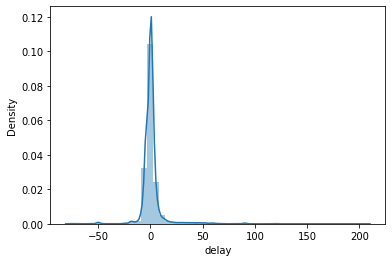

In [ ]:
sns.distplot(y_train)

In [ ]:
y_train

0       -1
1        4
2        0
3        1
7        0
        ..
34757    6
34758    0
34760    2
34762   -3
34763    1
Name: delay, Length: 27365, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


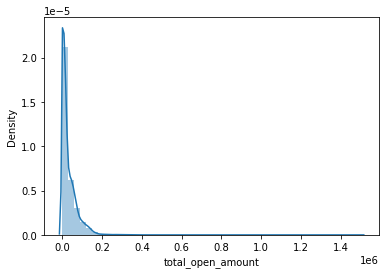

In [ ]:
sns.distplot(main_train.total_open_amount)

In [ ]:
main_train['total_open_amount']=np.log(main_train['total_open_amount'])  ##log transformation

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


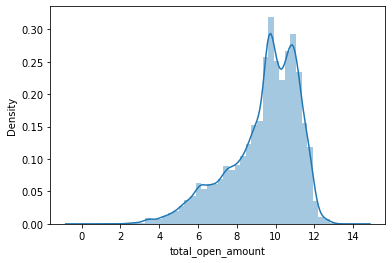

In [ ]:
sns.distplot(main_train.total_open_amount)

In [ ]:
x_train.corr()  ## checking correlation between the columns

,buisness_year,doc_id,total_open_amount,invoice_id,supposed_delay
buisness_year,1.000000,-0.008996,-0.012021,-0.008996,0.012954
doc_id,-0.008996,1.000000,0.184365,1.000000,0.098114
total_open_amount,-0.012021,0.184365,1.000000,0.184365,0.066416
invoice_id,-0.008996,1.000000,0.184365,1.000000,0.098114
supposed_delay,0.012954,0.098114,0.066416,0.098114,1.000000


In [ ]:
x_train = x_train.drop(['doc_id'],axis = 1) #dropping the doc_id column because of it's similar correlation value with invoice_id
x_val = x_val.drop(['doc_id'],axis = 1)
x_test = x_test.drop(['doc_id'],axis = 1)

In [ ]:
x_train.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27365 non-null  object        
 1   cust_number             27365 non-null  object        
 2   name_customer           27365 non-null  object        
 3   clear_date              27365 non-null  datetime64[ns]
 4   buisness_year           27365 non-null  float64       
 5   posting_date            27365 non-null  datetime64[ns]
 6   document_create_date.1  27365 non-null  datetime64[ns]
 7   due_in_date             27365 non-null  datetime64[ns]
 8   invoice_currency        27365 non-null  object        
 9   document type           27365 non-null  object        
 10  total_open_amount       27365 non-null  float64       
 11  baseline_create_date    27365 non-null  datetime64[ns]
 12  cust_payment_terms      27365 non-null  object

In [ ]:
x_train['baseline_create_date_day'] = x_train['baseline_create_date'].dt.day        ## Splitting the date columns to date and month , not year because that isn't much significant for the df given.
x_train['baseline_create_date_month'] = x_train['baseline_create_date'].dt.month

x_val['baseline_create_date_day'] = x_val['baseline_create_date'].dt.day
x_val['baseline_create_date_month'] = x_val['baseline_create_date'].dt.month

x_test['baseline_create_date_day'] = x_test['baseline_create_date'].dt.day
x_test['baseline_create_date_month'] = x_test['baseline_create_date'].dt.month

x_train['due_in_date_day'] = x_train['due_in_date'].dt.day
x_train['due_in_date_month'] = x_train['due_in_date'].dt.month

x_val['due_in_date_day'] = x_val['due_in_date'].dt.day
x_val['due_in_date_month'] = x_val['due_in_date'].dt.month

x_test['due_in_date_day'] = x_test['due_in_date'].dt.day
x_test['due_in_date_month'] = x_test['due_in_date'].dt.month

In [ ]:
x_train['document_create_date.1_day'] = x_train['document_create_date.1'].dt.day
x_train['document_create_date.1_month'] = x_train['document_create_date.1'].dt.month

x_val['document_create_date.1_day'] = x_val['document_create_date.1'].dt.day
x_val['document_create_date.1_month'] = x_val['document_create_date.1'].dt.month

x_test['document_create_date.1_day'] = x_test['document_create_date.1'].dt.day
x_test['document_create_date.1_month'] = x_test['document_create_date.1'].dt.month

x_train['posting_date_day'] = x_train['posting_date'].dt.day
x_train['posting_date_month'] = x_train['posting_date'].dt.month

x_val['posting_date_day'] = x_val['posting_date'].dt.day
x_val['posting_date_month'] = x_val['posting_date'].dt.month

x_test['posting_date_day'] = x_test['posting_date'].dt.day
x_test['posting_date_month'] = x_test['posting_date'].dt.month

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 27365 non-null  object        
 1   cust_number                   27365 non-null  object        
 2   name_customer                 27365 non-null  object        
 3   clear_date                    27365 non-null  datetime64[ns]
 4   buisness_year                 27365 non-null  float64       
 5   posting_date                  27365 non-null  datetime64[ns]
 6   document_create_date.1        27365 non-null  datetime64[ns]
 7   due_in_date                   27365 non-null  datetime64[ns]
 8   invoice_currency              27365 non-null  object        
 9   document type                 27365 non-null  object        
 10  total_open_amount             27365 non-null  float64       
 11  baseline_create_date        

In [ ]:
x_train.supposed_delay.value_counts()

-15     20330
-20       694
-10       665
-11       623
-35       472
        ...  
 161        1
 7          1
-27         1
-39         1
 20         1
Name: supposed_delay, Length: 61, dtype: int64

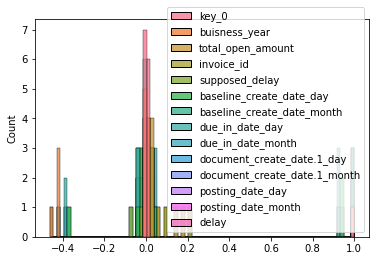

In [ ]:
sns.histplot(x_train.merge(y_train,on = x_train.index).corr())

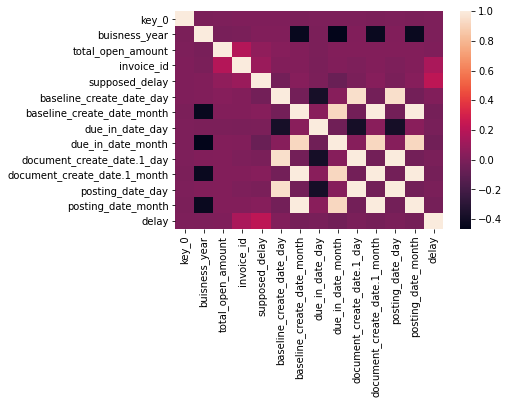

In [ ]:
sns.heatmap(x_train.merge(y_train,on = x_train.index).corr())  ## Nothing much can be interpreted but business_year could be dropped.

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 27365 non-null  object        
 1   cust_number                   27365 non-null  object        
 2   name_customer                 27365 non-null  object        
 3   clear_date                    27365 non-null  datetime64[ns]
 4   buisness_year                 27365 non-null  float64       
 5   posting_date                  27365 non-null  datetime64[ns]
 6   document_create_date.1        27365 non-null  datetime64[ns]
 7   due_in_date                   27365 non-null  datetime64[ns]
 8   invoice_currency              27365 non-null  object        
 9   document type                 27365 non-null  object        
 10  total_open_amount             27365 non-null  float64       
 11  baseline_create_date        

# **FEATURE ENGINEERING**

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 27365 non-null  object        
 1   cust_number                   27365 non-null  object        
 2   name_customer                 27365 non-null  object        
 3   clear_date                    27365 non-null  datetime64[ns]
 4   buisness_year                 27365 non-null  float64       
 5   posting_date                  27365 non-null  datetime64[ns]
 6   document_create_date.1        27365 non-null  datetime64[ns]
 7   due_in_date                   27365 non-null  datetime64[ns]
 8   invoice_currency              27365 non-null  object        
 9   document type                 27365 non-null  object        
 10  total_open_amount             27365 non-null  float64       
 11  baseline_create_date        

In [ ]:
from sklearn.preprocessing import LabelEncoder                    ## Encoding business_code , buisness_year , invoice_currency , customer_payment_terms is label encoded.
business_code_enc = LabelEncoder()
business_code_enc.fit(x_train['business_code'])
x_train['business_code_enc'] = business_code_enc.transform(x_train['business_code'])
x_test['business_code_enc'] = business_code_enc.transform(x_test['business_code'])
x_val['business_code_enc'] = business_code_enc.transform(x_val['business_code'])

buisness_year_enc = LabelEncoder()
buisness_year_enc.fit(x_train['buisness_year'])
x_train['buisness_year_enc'] = buisness_year_enc.transform(x_train['buisness_year'])
x_test['buisness_year_enc'] = buisness_year_enc.transform(x_test['buisness_year'])
x_val['buisness_year_enc'] = buisness_year_enc.transform(x_val['buisness_year'])

invoice_currency_enc = LabelEncoder()
invoice_currency_enc.fit(x_train['invoice_currency'])
x_train['invoice_currency_enc'] = invoice_currency_enc.transform(x_train['invoice_currency'])
x_test['invoice_currency_enc'] = invoice_currency_enc.transform(x_test['invoice_currency'])
x_val['invoice_currency_enc'] = invoice_currency_enc.transform(x_val['invoice_currency'])

cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(x_train['cust_payment_terms'])
cust_payment_terms_enc.fit(x_test['cust_payment_terms'])
x_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(x_test['cust_payment_terms'])
cust_payment_terms_enc.fit(x_val['cust_payment_terms'])
x_val['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(x_val['cust_payment_terms'])


*Frequency for customer cust_number , name_customer and total_open_amount is calculated . Thereafter grouping and mapping is done.*

In [ ]:
x_train. name_customer.value_counts()

WAL-MAR corporation    621
WAL-MAR corp           619
WAL-MAR foundation     618
WAL-MAR co             614
WAL-MAR                610
                      ... 
K&S  corp                1
SMITHFIE associates      1
LIPA in                  1
DASA I corporation       1
CRUMB foundation         1
Name: name_customer, Length: 3296, dtype: int64

In [ ]:
main_train.groupby('name_customer').size().reset_index(name='freq_name_customer')

,name_customer,freq_name_customer
0,10167 co,1
1,11078 corporation,1
2,11078 us,1
3,17135 associates,1
4,17135 corp,1
...,...,...
3869,YAEGER corp,1
3870,YEN BROS,1
3871,YEN BROS associates,1
3872,YEN BROS trust,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


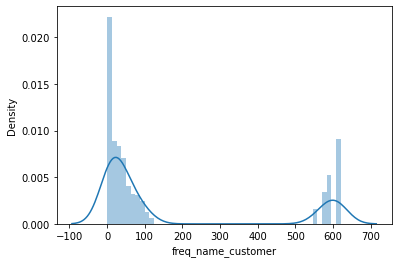

In [ ]:
x_train['freq_name_customer'] = x_train.name_customer.map(x_train.name_customer.value_counts().to_dict())
x_test['freq_name_customer'] = x_test.name_customer.map(x_test.name_customer.value_counts().to_dict())
x_val['freq_name_customer'] = x_val.name_customer.map(x_val.name_customer.value_counts().to_dict())
sns.distplot(x_train['freq_name_customer'])

In [ ]:
(x_train.merge(y_train,on=x_train.index)).corr()

,key_0,buisness_year,total_open_amount,invoice_id,supposed_delay,baseline_create_date_day,baseline_create_date_month,due_in_date_day,due_in_date_month,document_create_date.1_day,document_create_date.1_month,posting_date_day,posting_date_month,business_code_enc,buisness_year_enc,invoice_currency_enc,cust_payment_terms_enc,freq_name_customer,delay
key_0,1.000000,-0.002673,0.001288,0.006852,0.009803,0.006295,-0.000316,0.001840,0.002027,0.004412,-0.000186,0.004412,-0.000186,-0.011847,-0.002673,-0.007017,-0.006596,-0.005679,0.003470
buisness_year,-0.002673,1.000000,-0.012021,-0.008996,0.012954,0.015699,-0.428789,-0.004527,-0.462947,0.015316,-0.427640,0.015316,-0.427640,0.008869,1.000000,0.010186,-0.001408,0.001174,0.001392
total_open_amount,0.001288,-0.012021,1.000000,0.184365,0.066416,0.033558,0.022240,-0.002411,0.018481,0.018166,0.020494,0.018166,0.020494,-0.136313,-0.012021,-0.184859,-0.210221,-0.148902,0.006604
invoice_id,0.006852,-0.008996,0.184365,1.000000,0.098114,0.017334,0.022154,-0.007438,0.011678,0.001564,0.019817,0.001564,0.019817,-0.614476,-0.008996,-0.999390,-0.503147,-0.184652,0.150321
supposed_delay,0.009803,0.012954,0.066416,0.098114,1.000000,-0.030544,0.029200,-0.001391,-0.067494,-0.009360,0.029491,-0.009360,0.029491,-0.237933,0.012954,-0.104215,-0.245469,0.120491,0.218579
baseline_create_date_day,0.006295,0.015699,0.033558,0.017334,-0.030544,1.000000,-0.031222,-0.374714,0.036803,0.949110,-0.030272,0.949110,-0.030272,0.001074,0.015699,-0.016960,-0.036219,-0.001764,0.013295
baseline_create_date_month,-0.000316,-0.428789,0.022240,0.022154,0.029200,-0.031222,1.000000,0.042611,0.923435,-0.031255,0.996970,-0.031255,0.996970,-0.024852,-0.428789,-0.021592,-0.010506,0.004316,-0.025438
due_in_date_day,0.001840,-0.004527,-0.002411,-0.007438,-0.001391,-0.374714,0.042611,1.000000,-0.045608,-0.380386,0.043038,-0.380386,0.043038,-0.006321,-0.004527,0.006923,-0.000049,-0.002813,-0.014022
due_in_date_month,0.002027,-0.462947,0.018481,0.011678,-0.067494,0.036803,0.923435,-0.045608,1.000000,0.032053,0.920435,0.032053,0.920435,-0.001174,-0.462947,-0.010594,0.012049,-0.018247,-0.037358
document_create_date.1_day,0.004412,0.015316,0.018166,0.001564,-0.009360,0.949110,-0.031255,-0.380386,0.032053,1.000000,-0.031819,1.000000,-0.031819,0.007420,0.015316,-0.001318,-0.002638,-0.014767,-0.005804


In [ ]:
main_train.groupby('cust_number').size().reset_index(name='freq_cust_number')

,cust_number,freq_cust_number
0,0100000048,4
1,0100000051,3
2,0100000158,4
3,0100000217,1
4,0100000222,23
...,...,...
1330,CC7470,2
1331,CCCA02,447
1332,CCU001,37
1333,CCU002,108


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


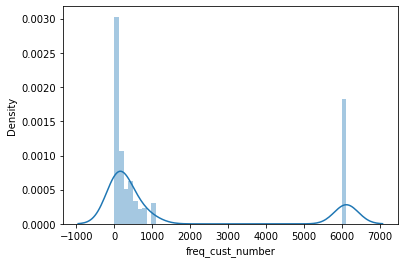

In [ ]:
x_train['freq_cust_number'] = x_train.cust_number.map(x_train.cust_number.value_counts().to_dict())
x_test['freq_cust_number'] = x_test.cust_number.map(x_test.cust_number.value_counts().to_dict())
x_val['freq_cust_number'] = x_val.cust_number.map(x_val.cust_number.value_counts().to_dict())
sns.distplot(x_train['freq_cust_number'])

In [ ]:
y_train.value_counts()

 0      5878
 1      3194
 2      2655
-5      2044
-4      1962
        ... 
-61        1
 202       1
-29        1
-37        1
-77        1
Name: delay, Length: 163, dtype: int64

In [ ]:
main_train.groupby(['delay']).size().reset_index(name='days_count')

,delay,days_count
0,-87,1
1,-83,1
2,-79,1
3,-78,1
4,-77,1
...,...,...
178,152,1
179,161,1
180,162,1
181,202,1


In [ ]:
x_train['total_open_amount']=x_train['total_open_amount'].astype(int)

In [ ]:
x_train.total_open_amount.value_counts()

471      75
1897     65
1898     62
1328     38
2373     34
         ..
59479     1
24662     1
1437      1
14413     1
0         1
Name: total_open_amount, Length: 20163, dtype: int64

In [ ]:
main_train.groupby(['total_open_amount']).size().reset_index(name='freq_total_open_amount')

,total_open_amount,freq_total_open_amount
0,-0.174353,1
1,0.343590,1
2,0.565314,1
3,1.229641,1
4,1.536867,1
...,...,...
35680,12.987625,1
35681,12.997079,1
35682,13.450737,1
35683,13.704931,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


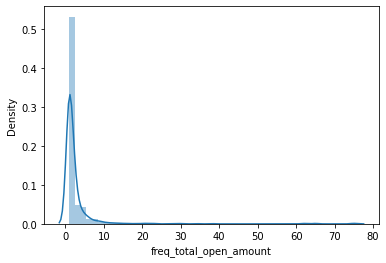

In [ ]:
x_train['freq_total_open_amount'] = x_train.total_open_amount.map(x_train.total_open_amount.value_counts().to_dict())
x_test['freq_total_open_amount'] = x_test.total_open_amount.map(x_test.total_open_amount.value_counts().to_dict())
x_val['freq_total_open_amount'] = x_val.total_open_amount.map(x_val.total_open_amount.value_counts().to_dict())
sns.distplot(x_train['freq_total_open_amount'])

In [ ]:
x_train[['business_code_enc','business_code']]

,business_code_enc,business_code
0,1,U001
1,0,CA02
2,1,U001
3,1,U001
7,1,U001
...,...,...
34757,1,U001
34758,1,U001
34760,1,U001
34762,1,U001


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 27365 non-null  object        
 1   cust_number                   27365 non-null  object        
 2   name_customer                 27365 non-null  object        
 3   clear_date                    27365 non-null  datetime64[ns]
 4   buisness_year                 27365 non-null  float64       
 5   posting_date                  27365 non-null  datetime64[ns]
 6   document_create_date.1        27365 non-null  datetime64[ns]
 7   due_in_date                   27365 non-null  datetime64[ns]
 8   invoice_currency              27365 non-null  object        
 9   document type                 27365 non-null  object        
 10  total_open_amount             27365 non-null  int64         
 11  baseline_create_date        

In [ ]:
## Dropping all the columns that are encoded and the date columns which are splited.

In [ ]:
x_train = x_train.drop(['business_code','buisness_year','cust_number','name_customer','invoice_currency','document type','cust_payment_terms','clear_date','posting_date','document_create_date.1','due_in_date','baseline_create_date'],axis=1)
x_test = x_test.drop(['business_code','buisness_year','cust_number','name_customer','invoice_currency','document type','cust_payment_terms','clear_date','posting_date','document_create_date.1','due_in_date','baseline_create_date'],axis=1)
x_val = x_val.drop(['business_code','buisness_year','cust_number','name_customer','invoice_currency','document type','cust_payment_terms','clear_date','posting_date','document_create_date.1','due_in_date','baseline_create_date'],axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             27365 non-null  int64  
 1   invoice_id                    27365 non-null  float64
 2   supposed_delay                27365 non-null  int64  
 3   baseline_create_date_day      27365 non-null  int64  
 4   baseline_create_date_month    27365 non-null  int64  
 5   due_in_date_day               27365 non-null  int64  
 6   due_in_date_month             27365 non-null  int64  
 7   document_create_date.1_day    27365 non-null  int64  
 8   document_create_date.1_month  27365 non-null  int64  
 9   posting_date_day              27365 non-null  int64  
 10  posting_date_month            27365 non-null  int64  
 11  business_code_enc             27365 non-null  int64  
 12  buisness_year_enc             27365 non-null  int64  
 13  i

In [ ]:
x_train.corr()

,total_open_amount,invoice_id,supposed_delay,baseline_create_date_day,baseline_create_date_month,due_in_date_day,due_in_date_month,document_create_date.1_day,document_create_date.1_month,posting_date_day,posting_date_month,business_code_enc,buisness_year_enc,invoice_currency_enc,cust_payment_terms_enc,freq_name_customer,freq_cust_number,freq_total_open_amount
total_open_amount,1.000000,0.184366,0.066416,0.033558,0.022240,-0.002411,0.018481,0.018166,0.020494,0.018166,0.020494,-0.136313,-0.012021,-0.184859,-0.210221,-0.148902,-0.137726,-0.176339
invoice_id,0.184366,1.000000,0.098114,0.017334,0.022154,-0.007438,0.011678,0.001564,0.019817,0.001564,0.019817,-0.614476,-0.008996,-0.999390,-0.503147,-0.184652,-0.170979,-0.058214
supposed_delay,0.066416,0.098114,1.000000,-0.030544,0.029200,-0.001391,-0.067494,-0.009360,0.029491,-0.009360,0.029491,-0.237933,0.012954,-0.104215,-0.245469,0.120491,0.111674,0.020179
baseline_create_date_day,0.033558,0.017334,-0.030544,1.000000,-0.031222,-0.374714,0.036803,0.949110,-0.030272,0.949110,-0.030272,0.001074,0.015699,-0.016960,-0.036219,-0.001764,0.008570,-0.008914
baseline_create_date_month,0.022240,0.022154,0.029200,-0.031222,1.000000,0.042611,0.923435,-0.031255,0.996970,-0.031255,0.996970,-0.024852,-0.428789,-0.021592,-0.010506,0.004316,0.014533,0.024210
due_in_date_day,-0.002411,-0.007438,-0.001391,-0.374714,0.042611,1.000000,-0.045608,-0.380386,0.043038,-0.380386,0.043038,-0.006321,-0.004527,0.006923,-0.000049,-0.002813,-0.010163,-0.001213
due_in_date_month,0.018481,0.011678,-0.067494,0.036803,0.923435,-0.045608,1.000000,0.032053,0.920435,0.032053,0.920435,-0.001174,-0.462947,-0.010594,0.012049,-0.018247,-0.007517,0.014603
document_create_date.1_day,0.018166,0.001564,-0.009360,0.949110,-0.031255,-0.380386,0.032053,1.000000,-0.031819,1.000000,-0.031819,0.007420,0.015316,-0.001318,-0.002638,-0.014767,-0.008018,-0.007762
document_create_date.1_month,0.020494,0.019817,0.029491,-0.030272,0.996970,0.043038,0.920435,-0.031819,1.000000,-0.031819,1.000000,-0.023343,-0.427640,-0.019253,-0.009649,0.004827,0.015032,0.024501
posting_date_day,0.018166,0.001564,-0.009360,0.949110,-0.031255,-0.380386,0.032053,1.000000,-0.031819,1.000000,-0.031819,0.007420,0.015316,-0.001318,-0.002638,-0.014767,-0.008018,-0.007762


In [ ]:
x_train = x_train.drop(['baseline_create_date_day','baseline_create_date_month'],axis=1)   ##It has a high relation with most of the date columns hence dropped.
x_test = x_test.drop(['baseline_create_date_day','baseline_create_date_month'],axis=1)
x_val = x_val.drop(['baseline_create_date_day','baseline_create_date_month'],axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             27365 non-null  int64  
 1   invoice_id                    27365 non-null  float64
 2   supposed_delay                27365 non-null  int64  
 3   due_in_date_day               27365 non-null  int64  
 4   due_in_date_month             27365 non-null  int64  
 5   document_create_date.1_day    27365 non-null  int64  
 6   document_create_date.1_month  27365 non-null  int64  
 7   posting_date_day              27365 non-null  int64  
 8   posting_date_month            27365 non-null  int64  
 9   business_code_enc             27365 non-null  int64  
 10  buisness_year_enc             27365 non-null  int64  
 11  invoice_currency_enc          27365 non-null  int64  
 12  cust_payment_terms_enc        27365 non-null  int64  
 13  f

In [ ]:
x_train['total_open_amount']

0           471
1         53243
2         66232
3         36608
7        110303
          ...  
34757     33103
34758       403
34760    108305
34762     49953
34763     69911
Name: total_open_amount, Length: 27365, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


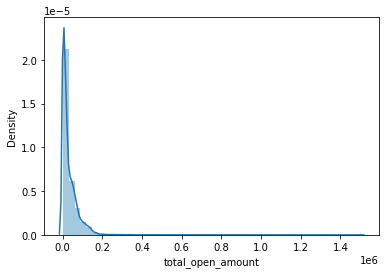

In [ ]:
sns.distplot(x_train.total_open_amount)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


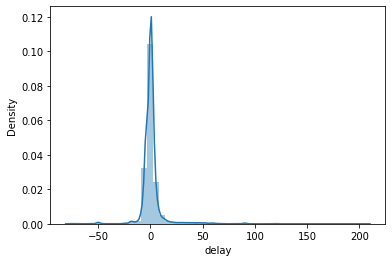

In [ ]:
sns.distplot(y_train)

In [ ]:
from sklearn.feature_selection import VarianceThreshold  ## Comparing through variance threshold.
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [ ]:
sel.variances_

array([1.68563157e+09, 7.73381455e+16, 1.10971296e+02, 7.68076461e+01,
       1.21211241e+01, 7.55834659e+01, 1.22532359e+01, 7.55834659e+01,
       1.22532359e+01, 1.97381782e-01, 1.13358128e-01, 7.28871307e-02,
       1.29930647e+02, 5.88692833e+04, 6.04713241e+06, 4.32866693e+01])

In [ ]:
x_train['amount_log']=np.log(x_train.total_open_amount)  ## Log transformation done to correct the right skewness.
x_val['amount_log']=np.log(x_val.total_open_amount)
x_test['amount_log']=np.log(x_test.total_open_amount)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
x_train['amount_log']

0         6.154858
1        10.882622
2        11.100919
3        10.508022
7        11.610986
           ...    
34757    10.407379
34758     5.998937
34760    11.592707
34762    10.818838
34763    11.154978
Name: amount_log, Length: 27365, dtype: float64

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             27365 non-null  int64  
 1   invoice_id                    27365 non-null  float64
 2   supposed_delay                27365 non-null  int64  
 3   due_in_date_day               27365 non-null  int64  
 4   due_in_date_month             27365 non-null  int64  
 5   document_create_date.1_day    27365 non-null  int64  
 6   document_create_date.1_month  27365 non-null  int64  
 7   posting_date_day              27365 non-null  int64  
 8   posting_date_month            27365 non-null  int64  
 9   business_code_enc             27365 non-null  int64  
 10  buisness_year_enc             27365 non-null  int64  
 11  invoice_currency_enc          27365 non-null  int64  
 12  cust_payment_terms_enc        27365 non-null  int64  
 13  f

In [ ]:
x_train = x_train.drop(['amount_log'],axis=1) ## frequency mapping gave better results hence dropping this one.
x_test = x_test.drop(['amount_log'],axis=1)
x_val = x_val.drop(['amount_log'],axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   total_open_amount             27365 non-null  int64  
 1   invoice_id                    27365 non-null  float64
 2   supposed_delay                27365 non-null  int64  
 3   due_in_date_day               27365 non-null  int64  
 4   due_in_date_month             27365 non-null  int64  
 5   document_create_date.1_day    27365 non-null  int64  
 6   document_create_date.1_month  27365 non-null  int64  
 7   posting_date_day              27365 non-null  int64  
 8   posting_date_month            27365 non-null  int64  
 9   business_code_enc             27365 non-null  int64  
 10  buisness_year_enc             27365 non-null  int64  
 11  invoice_currency_enc          27365 non-null  int64  
 12  cust_payment_terms_enc        27365 non-null  int64  
 13  f

In [ ]:
x_train.corr()

,total_open_amount,invoice_id,supposed_delay,due_in_date_day,due_in_date_month,document_create_date.1_day,document_create_date.1_month,posting_date_day,posting_date_month,business_code_enc,buisness_year_enc,invoice_currency_enc,cust_payment_terms_enc,freq_name_customer,freq_cust_number,freq_total_open_amount
total_open_amount,1.000000,0.184366,0.066416,-0.002411,0.018481,0.018166,0.020494,0.018166,0.020494,-0.136313,-0.012021,-0.184859,-0.210221,-0.148902,-0.137726,-0.176339
invoice_id,0.184366,1.000000,0.098114,-0.007438,0.011678,0.001564,0.019817,0.001564,0.019817,-0.614476,-0.008996,-0.999390,-0.503147,-0.184652,-0.170979,-0.058214
supposed_delay,0.066416,0.098114,1.000000,-0.001391,-0.067494,-0.009360,0.029491,-0.009360,0.029491,-0.237933,0.012954,-0.104215,-0.245469,0.120491,0.111674,0.020179
due_in_date_day,-0.002411,-0.007438,-0.001391,1.000000,-0.045608,-0.380386,0.043038,-0.380386,0.043038,-0.006321,-0.004527,0.006923,-0.000049,-0.002813,-0.010163,-0.001213
due_in_date_month,0.018481,0.011678,-0.067494,-0.045608,1.000000,0.032053,0.920435,0.032053,0.920435,-0.001174,-0.462947,-0.010594,0.012049,-0.018247,-0.007517,0.014603
document_create_date.1_day,0.018166,0.001564,-0.009360,-0.380386,0.032053,1.000000,-0.031819,1.000000,-0.031819,0.007420,0.015316,-0.001318,-0.002638,-0.014767,-0.008018,-0.007762
document_create_date.1_month,0.020494,0.019817,0.029491,0.043038,0.920435,-0.031819,1.000000,-0.031819,1.000000,-0.023343,-0.427640,-0.019253,-0.009649,0.004827,0.015032,0.024501
posting_date_day,0.018166,0.001564,-0.009360,-0.380386,0.032053,1.000000,-0.031819,1.000000,-0.031819,0.007420,0.015316,-0.001318,-0.002638,-0.014767,-0.008018,-0.007762
posting_date_month,0.020494,0.019817,0.029491,0.043038,0.920435,-0.031819,1.000000,-0.031819,1.000000,-0.023343,-0.427640,-0.019253,-0.009649,0.004827,0.015032,0.024501
business_code_enc,-0.136313,-0.614476,-0.237933,-0.006321,-0.001174,0.007420,-0.023343,0.007420,-0.023343,1.000000,0.008869,0.634214,0.520964,0.046999,0.042566,0.020139


In [ ]:
 ##Droping them all and keeping the document_create_date.1_month because the correlation was quiet high among them. Had to keep due_in_date for the date prediction part during testing.

In [ ]:
x_train=x_train.drop(['invoice_id','document_create_date.1_day','posting_date_day','posting_date_month'],axis=1) 
x_test=x_test.drop(['invoice_id','document_create_date.1_day','posting_date_day','posting_date_month'],axis=1)       
x_val=x_val.drop(['invoice_id','document_create_date.1_day','posting_date_day','posting_date_month'],axis=1)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   total_open_amount             27365 non-null  int64
 1   supposed_delay                27365 non-null  int64
 2   due_in_date_day               27365 non-null  int64
 3   due_in_date_month             27365 non-null  int64
 4   document_create_date.1_month  27365 non-null  int64
 5   business_code_enc             27365 non-null  int64
 6   buisness_year_enc             27365 non-null  int64
 7   invoice_currency_enc          27365 non-null  int64
 8   cust_payment_terms_enc        27365 non-null  int64
 9   freq_name_customer            27365 non-null  int64
 10  freq_cust_number              27365 non-null  int64
 11  freq_total_open_amount        27365 non-null  int64
dtypes: int64(12)
memory usage: 2.7 MB


## **MODELLING**

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
base_model = LinearRegression()
base_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_train.shape,y_train.shape

((27365, 12), (27365,))

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27365 entries, 0 to 34763
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   total_open_amount             27365 non-null  int64
 1   supposed_delay                27365 non-null  int64
 2   due_in_date_day               27365 non-null  int64
 3   due_in_date_month             27365 non-null  int64
 4   document_create_date.1_month  27365 non-null  int64
 5   business_code_enc             27365 non-null  int64
 6   buisness_year_enc             27365 non-null  int64
 7   invoice_currency_enc          27365 non-null  int64
 8   cust_payment_terms_enc        27365 non-null  int64
 9   freq_name_customer            27365 non-null  int64
 10  freq_cust_number              27365 non-null  int64
 11  freq_total_open_amount        27365 non-null  int64
dtypes: int64(12)
memory usage: 2.7 MB


In [ ]:
y_train.dtypes

dtype('int64')

In [ ]:
x_train.dtypes

total_open_amount               int64
supposed_delay                  int64
due_in_date_day                 int64
due_in_date_month               int64
document_create_date.1_month    int64
business_code_enc               int64
buisness_year_enc               int64
invoice_currency_enc            int64
cust_payment_terms_enc          int64
freq_name_customer              int64
freq_cust_number                int64
freq_total_open_amount          int64
dtype: object

In [ ]:
y_predict = base_model.predict(x_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_predict, squared=False)

10.248235435769056

In [ ]:
np.sqrt(mean_squared_error(y_val, y_predict, squared=False))

3.2012865282209675

In [ ]:
y_test.dtype

dtype('int64')

In [ ]:
met = pd.DataFrame(zip(y_predict , y_val),columns=['Predicted','Actuals'])

In [ ]:
met

,Predicted,Actuals
0,2.676930,-4
1,-1.431497,-2
2,-12.177560,0
3,2.386558,4
4,0.717083,3
...,...,...
5859,0.709449,-1
5860,3.482990,4
5861,8.691581,7
5862,5.820590,4


**TREE BASED MODEL**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=6)

In [ ]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
y_predict2 = regressor.predict(x_val)

In [ ]:
met = pd.DataFrame(zip(y_predict , y_test),columns=['Predicted','Actuals'])

In [ ]:
(abs(met.Predicted-met.Actuals)/met.Actuals).mean()

inf

In [ ]:
np.sqrt(mean_squared_error(y_val, y_predict2, squared=False))

3.345722631550432

## **LOGISTIC REGRESSION**

In [ ]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y = True)
LRG = linear_model.LogisticRegression(
random_state = 0,solver = 'liblinear',).fit(X, y)
LRG.score(X, y)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_val, y_predict, squared=False))

3.2012865282209675

## **NEAREST NEIGHBOURS**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(x_train, y_train)
y_predict3 = neigh.predict(x_val)
mean_squared_error(y_val, y_predict3, squared=False)
np.sqrt(mean_squared_error(y_val, y_predict, squared=False))

3.2012865282209675

*Going with linear regression.*

## **CONFIRMATION**

In [ ]:
y_predict_test = regressor.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_predict_test, squared=False))

3.6702409427955134

In [ ]:
## Through x_test RMSE is 3.6702409427955134.
## Through x_val it's 3.2012865282209675.

##**WORKING ON MAIN_TEST**

*Performing similar steps to main_test. (excluding the EDA part)*

In [ ]:
main_test['due_in_date']= main_test['due_in_date'].astype(int)          
main_test['due_in_date'] = main_test['due_in_date'].astype(str)
main_test['document_create_date.1'] = main_test['document_create_date.1'].astype(int)
main_test['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'])
main_test['due_in_date'] = pd.to_datetime(df['due_in_date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
main_test['document_create_date.1_month'] = main_test['document_create_date.1'].dt.month
main_test['due_in_date_day'] = main_test['due_in_date'].dt.day
main_test['due_in_date_month'] = main_test['due_in_date'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
X_main_test = main_test.drop(['clear_date'],axis=1)
X_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date.1_month,due_in_date_day,due_in_date_month
4,U001,0200782772,ASSOC G llc,2020.0,1.930725e+09,2020-03-31,2020-03-31,2020-04-15,USD,RV,31604.77,2020-03-31,NAA8,1.930725e+09,1,3,15,4
5,CA02,0140104423,METRO associates,2020.0,2.960621e+09,2020-03-15,2020-03-15,2020-03-27,CAD,RV,103151.91,2020-03-17,CA10,2.960621e+09,1,3,27,3
6,U001,0200035911,MBM,2020.0,1.930754e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,18957.35,2020-04-08,NAA8,1.930754e+09,1,4,23,4
11,U001,0200763814,SYSCO F co,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-19,USD,RV,8271.35,2020-05-04,NAA8,1.930857e+09,1,5,19,5
17,CA02,0140104409,LOB us,2020.0,2.960618e+09,2020-03-11,2020-03-11,2020-03-22,CAD,RV,67051.08,2020-03-12,CA10,2.960618e+09,1,3,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,U001,0200148860,DOLLA trust,2020.0,1.930712e+09,2020-03-30,2020-03-30,2020-06-03,USD,RV,3888.52,2020-03-30,NAGD,1.930712e+09,1,3,3,6
49986,U001,0200726979,BJ'S systems,2020.0,1.930642e+09,2020-03-12,2020-03-12,2020-03-27,USD,RV,132.04,2020-03-12,NAA8,1.930642e+09,1,3,27,3
49992,U001,0200744019,TARG co,2020.0,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,46740.70,2020-02-27,NAA8,1.930570e+09,1,2,13,3
49997,U001,0200726979,BJ'S trust,2020.0,1.930858e+09,2020-05-05,2020-05-05,2020-05-20,USD,RV,61.69,2020-05-05,NAA8,1.930858e+09,1,5,20,5


In [ ]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date.1_month,due_in_date_day,due_in_date_month
4,U001,0200782772,ASSOC G llc,NaT,2020.0,1.930725e+09,2020-03-31,2020-03-31,2020-04-15,USD,RV,31604.77,2020-03-31,NAA8,1.930725e+09,1,3,15,4
5,CA02,0140104423,METRO associates,NaT,2020.0,2.960621e+09,2020-03-15,2020-03-15,2020-03-27,CAD,RV,103151.91,2020-03-17,CA10,2.960621e+09,1,3,27,3
6,U001,0200035911,MBM,NaT,2020.0,1.930754e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,18957.35,2020-04-08,NAA8,1.930754e+09,1,4,23,4
11,U001,0200763814,SYSCO F co,NaT,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-19,USD,RV,8271.35,2020-05-04,NAA8,1.930857e+09,1,5,19,5
17,CA02,0140104409,LOB us,NaT,2020.0,2.960618e+09,2020-03-11,2020-03-11,2020-03-22,CAD,RV,67051.08,2020-03-12,CA10,2.960618e+09,1,3,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,U001,0200148860,DOLLA trust,NaT,2020.0,1.930712e+09,2020-03-30,2020-03-30,2020-06-03,USD,RV,3888.52,2020-03-30,NAGD,1.930712e+09,1,3,3,6
49986,U001,0200726979,BJ'S systems,NaT,2020.0,1.930642e+09,2020-03-12,2020-03-12,2020-03-27,USD,RV,132.04,2020-03-12,NAA8,1.930642e+09,1,3,27,3
49992,U001,0200744019,TARG co,NaT,2020.0,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,46740.70,2020-02-27,NAA8,1.930570e+09,1,2,13,3
49997,U001,0200726979,BJ'S trust,NaT,2020.0,1.930858e+09,2020-05-05,2020-05-05,2020-05-20,USD,RV,61.69,2020-05-05,NAA8,1.930858e+09,1,5,20,5


In [ ]:
main_train[main_train.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,supposed_delay


In [ ]:
main_test = main_test[main_test.invoice_id.isnull()==False] 

In [ ]:
main_test.drop(['isOpen','doc_id'],axis = 1,inplace=True) #it has just one unique value 

In [ ]:
main_test.sort_values(by=['clear_date'])

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,document_create_date.1_month,due_in_date_day,due_in_date_month
4,U001,0200782772,ASSOC G llc,NaT,2020.0,2020-03-31,2020-03-31,2020-04-15,USD,RV,31604.77,2020-03-31,NAA8,1.930725e+09,3,15,4
5,CA02,0140104423,METRO associates,NaT,2020.0,2020-03-15,2020-03-15,2020-03-27,CAD,RV,103151.91,2020-03-17,CA10,2.960621e+09,3,27,3
6,U001,0200035911,MBM,NaT,2020.0,2020-04-08,2020-04-08,2020-04-23,USD,RV,18957.35,2020-04-08,NAA8,1.930754e+09,4,23,4
11,U001,0200763814,SYSCO F co,NaT,2020.0,2020-05-04,2020-05-04,2020-05-19,USD,RV,8271.35,2020-05-04,NAA8,1.930857e+09,5,19,5
17,CA02,0140104409,LOB us,NaT,2020.0,2020-03-11,2020-03-11,2020-03-22,CAD,RV,67051.08,2020-03-12,CA10,2.960618e+09,3,22,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,U001,0200148860,DOLLA trust,NaT,2020.0,2020-03-30,2020-03-30,2020-06-03,USD,RV,3888.52,2020-03-30,NAGD,1.930712e+09,3,3,6
49986,U001,0200726979,BJ'S systems,NaT,2020.0,2020-03-12,2020-03-12,2020-03-27,USD,RV,132.04,2020-03-12,NAA8,1.930642e+09,3,27,3
49992,U001,0200744019,TARG co,NaT,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,RV,46740.70,2020-02-27,NAA8,1.930570e+09,2,13,3
49997,U001,0200726979,BJ'S trust,NaT,2020.0,2020-05-05,2020-05-05,2020-05-20,USD,RV,61.69,2020-05-05,NAA8,1.930858e+09,5,20,5


In [ ]:
main_test['supposed_delay']=main_test['document_create_date.1']- main_test['due_in_date']

In [ ]:
main_test['supposed_delay']=main_test['supposed_delay'].astype(str)
main_test['supposed_delay']= main_test['supposed_delay'].str.replace(' days','').astype(int)

In [ ]:
main_test.drop(['clear_date','document type','baseline_create_date','posting_date'],axis = 1,inplace=True)

In [ ]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9704 entries, 4 to 49999
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 9704 non-null   object        
 1   cust_number                   9704 non-null   object        
 2   name_customer                 9704 non-null   object        
 3   buisness_year                 9704 non-null   float64       
 4   document_create_date.1        9704 non-null   datetime64[ns]
 5   due_in_date                   9704 non-null   datetime64[ns]
 6   invoice_currency              9704 non-null   object        
 7   total_open_amount             9704 non-null   float64       
 8   cust_payment_terms            9704 non-null   object        
 9   invoice_id                    9704 non-null   float64       
 10  document_create_date.1_month  9704 non-null   int64         
 11  due_in_date_day              

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_code_enc = LabelEncoder()
business_code_enc.fit(main_test['business_code'])
main_test['business_code_enc'] = business_code_enc.transform(main_test['business_code'])

buisness_year_enc = LabelEncoder()
buisness_year_enc.fit(main_test['buisness_year'])
main_test['buisness_year_enc'] = buisness_year_enc.transform(main_test['buisness_year'])

invoice_currency_enc = LabelEncoder()
invoice_currency_enc.fit(main_test['invoice_currency'])
main_test['invoice_currency_enc'] = invoice_currency_enc.transform(main_test['invoice_currency'])

cust_payment_terms_enc = LabelEncoder()
cust_payment_terms_enc.fit(main_test['cust_payment_terms'])
main_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(main_test['cust_payment_terms'])

In [ ]:
main_test

,business_code,cust_number,name_customer,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,document_create_date.1_month,due_in_date_day,due_in_date_month,supposed_delay,business_code_enc,buisness_year_enc,invoice_currency_enc,cust_payment_terms_enc
4,U001,0200782772,ASSOC G llc,2020.0,2020-03-31,2020-04-15,USD,31604.77,NAA8,1.930725e+09,3,15,4,-15,1,0,1,10
5,CA02,0140104423,METRO associates,2020.0,2020-03-15,2020-03-27,CAD,103151.91,CA10,2.960621e+09,3,27,3,-12,0,0,0,2
6,U001,0200035911,MBM,2020.0,2020-04-08,2020-04-23,USD,18957.35,NAA8,1.930754e+09,4,23,4,-15,1,0,1,10
11,U001,0200763814,SYSCO F co,2020.0,2020-05-04,2020-05-19,USD,8271.35,NAA8,1.930857e+09,5,19,5,-15,1,0,1,10
17,CA02,0140104409,LOB us,2020.0,2020-03-11,2020-03-22,CAD,67051.08,CA10,2.960618e+09,3,22,3,-11,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49971,U001,0200148860,DOLLA trust,2020.0,2020-03-30,2020-06-03,USD,3888.52,NAGD,1.930712e+09,3,3,6,-65,1,0,1,24
49986,U001,0200726979,BJ'S systems,2020.0,2020-03-12,2020-03-27,USD,132.04,NAA8,1.930642e+09,3,27,3,-15,1,0,1,10
49992,U001,0200744019,TARG co,2020.0,2020-02-27,2020-03-13,USD,46740.70,NAA8,1.930570e+09,2,13,3,-15,1,0,1,10
49997,U001,0200726979,BJ'S trust,2020.0,2020-05-05,2020-05-20,USD,61.69,NAA8,1.930858e+09,5,20,5,-15,1,0,1,10


In [ ]:
main_test['freq_name_customer'] = main_test.name_customer.map(main_test.name_customer.value_counts().to_dict())
main_test['freq_total_open_amount'] = main_test.total_open_amount.map(main_test.total_open_amount.value_counts().to_dict())
main_test['freq_cust_number'] = main_test.cust_number.map(main_test.cust_number.value_counts().to_dict())

In [ ]:
main_test.drop(['due_in_date','cust_number','name_customer','invoice_currency'],axis=1,inplace=True)

In [ ]:
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9704 entries, 4 to 49999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   business_code                 9704 non-null   object        
 1   buisness_year                 9704 non-null   float64       
 2   document_create_date.1        9704 non-null   datetime64[ns]
 3   total_open_amount             9704 non-null   float64       
 4   cust_payment_terms            9704 non-null   object        
 5   invoice_id                    9704 non-null   float64       
 6   document_create_date.1_month  9704 non-null   int64         
 7   due_in_date_day               9704 non-null   int64         
 8   due_in_date_month             9704 non-null   int64         
 9   supposed_delay                9704 non-null   int64         
 10  business_code_enc             9704 non-null   int64         
 11  buisness_year_enc            

In [ ]:
main_test.drop(['buisness_year','invoice_id','cust_payment_terms','business_code','document_create_date.1'],axis=1,inplace=True)
main_test['total_open_amount'] = main_test['total_open_amount'].astype(int)
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9704 entries, 4 to 49999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   total_open_amount             9704 non-null   int64
 1   document_create_date.1_month  9704 non-null   int64
 2   due_in_date_day               9704 non-null   int64
 3   due_in_date_month             9704 non-null   int64
 4   supposed_delay                9704 non-null   int64
 5   business_code_enc             9704 non-null   int64
 6   buisness_year_enc             9704 non-null   int64
 7   invoice_currency_enc          9704 non-null   int64
 8   cust_payment_terms_enc        9704 non-null   int64
 9   freq_name_customer            9704 non-null   int64
 10  freq_total_open_amount        9704 non-null   int64
 11  freq_cust_number              9704 non-null   int64
dtypes: int64(12)
memory usage: 985.6 KB


## **FINAL PREDICTION**

In [ ]:
final_result = regressor.predict(main_test)

In [ ]:
final_result = pd.Series(final_result,name='delay')

In [ ]:
X_main_test.reset_index(drop=True,inplace=True)

In [ ]:
Final = X_main_test.merge(final_result , on = main_test.index )
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date.1_month,due_in_date_day,due_in_date_month,delay
0,4,U001,0200782772,ASSOC G llc,2020.0,1.930725e+09,2020-03-31,2020-03-31,2020-04-15,USD,RV,31604.77,2020-03-31,NAA8,1.930725e+09,1,3,15,4,0.925885
1,5,CA02,0140104423,METRO associates,2020.0,2.960621e+09,2020-03-15,2020-03-15,2020-03-27,CAD,RV,103151.91,2020-03-17,CA10,2.960621e+09,1,3,27,3,8.811111
2,6,U001,0200035911,MBM,2020.0,1.930754e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,18957.35,2020-04-08,NAA8,1.930754e+09,1,4,23,4,0.925885
3,11,U001,0200763814,SYSCO F co,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-19,USD,RV,8271.35,2020-05-04,NAA8,1.930857e+09,1,5,19,5,1.815832
4,17,CA02,0140104409,LOB us,2020.0,2.960618e+09,2020-03-11,2020-03-11,2020-03-22,CAD,RV,67051.08,2020-03-12,CA10,2.960618e+09,1,3,22,3,8.811111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,49971,U001,0200148860,DOLLA trust,2020.0,1.930712e+09,2020-03-30,2020-03-30,2020-06-03,USD,RV,3888.52,2020-03-30,NAGD,1.930712e+09,1,3,3,6,1.815832
9700,49986,U001,0200726979,BJ'S systems,2020.0,1.930642e+09,2020-03-12,2020-03-12,2020-03-27,USD,RV,132.04,2020-03-12,NAA8,1.930642e+09,1,3,27,3,1.815832
9701,49992,U001,0200744019,TARG co,2020.0,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,46740.70,2020-02-27,NAA8,1.930570e+09,1,2,13,3,0.925885
9702,49997,U001,0200726979,BJ'S trust,2020.0,1.930858e+09,2020-05-05,2020-05-05,2020-05-20,USD,RV,61.69,2020-05-05,NAA8,1.930858e+09,1,5,20,5,1.815832


In [ ]:
Final['Predicted_day']=Final['due_in_date_day'] + Final['delay']

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date.1_month,due_in_date_day,due_in_date_month,delay,Predicted_day
0,4,U001,0200782772,ASSOC G llc,2020.0,1.930725e+09,2020-03-31,2020-03-31,2020-04-15,USD,RV,31604.77,2020-03-31,NAA8,1.930725e+09,1,3,15,4,0.925885,15.925885
1,5,CA02,0140104423,METRO associates,2020.0,2.960621e+09,2020-03-15,2020-03-15,2020-03-27,CAD,RV,103151.91,2020-03-17,CA10,2.960621e+09,1,3,27,3,8.811111,35.811111
2,6,U001,0200035911,MBM,2020.0,1.930754e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,18957.35,2020-04-08,NAA8,1.930754e+09,1,4,23,4,0.925885,23.925885
3,11,U001,0200763814,SYSCO F co,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-19,USD,RV,8271.35,2020-05-04,NAA8,1.930857e+09,1,5,19,5,1.815832,20.815832
4,17,CA02,0140104409,LOB us,2020.0,2.960618e+09,2020-03-11,2020-03-11,2020-03-22,CAD,RV,67051.08,2020-03-12,CA10,2.960618e+09,1,3,22,3,8.811111,30.811111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,49971,U001,0200148860,DOLLA trust,2020.0,1.930712e+09,2020-03-30,2020-03-30,2020-06-03,USD,RV,3888.52,2020-03-30,NAGD,1.930712e+09,1,3,3,6,1.815832,4.815832
9700,49986,U001,0200726979,BJ'S systems,2020.0,1.930642e+09,2020-03-12,2020-03-12,2020-03-27,USD,RV,132.04,2020-03-12,NAA8,1.930642e+09,1,3,27,3,1.815832,28.815832
9701,49992,U001,0200744019,TARG co,2020.0,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,46740.70,2020-02-27,NAA8,1.930570e+09,1,2,13,3,0.925885,13.925885
9702,49997,U001,0200726979,BJ'S trust,2020.0,1.930858e+09,2020-05-05,2020-05-05,2020-05-20,USD,RV,61.69,2020-05-05,NAA8,1.930858e+09,1,5,20,5,1.815832,21.815832


In [ ]:
Final['delay'] = Final.delay.round(0).astype(int)
Final['Predicted_day'] = Final.Predicted_day.round(0).astype(int)

In [ ]:
Final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,document_create_date.1_month,due_in_date_day,due_in_date_month,delay,Predicted_day
0,4,U001,0200782772,ASSOC G llc,2020.0,1.930725e+09,2020-03-31,2020-03-31,2020-04-15,USD,RV,31604.77,2020-03-31,NAA8,1.930725e+09,1,3,15,4,1,16
1,5,CA02,0140104423,METRO associates,2020.0,2.960621e+09,2020-03-15,2020-03-15,2020-03-27,CAD,RV,103151.91,2020-03-17,CA10,2.960621e+09,1,3,27,3,9,36
2,6,U001,0200035911,MBM,2020.0,1.930754e+09,2020-04-08,2020-04-08,2020-04-23,USD,RV,18957.35,2020-04-08,NAA8,1.930754e+09,1,4,23,4,1,24
3,11,U001,0200763814,SYSCO F co,2020.0,1.930857e+09,2020-05-04,2020-05-04,2020-05-19,USD,RV,8271.35,2020-05-04,NAA8,1.930857e+09,1,5,19,5,2,21
4,17,CA02,0140104409,LOB us,2020.0,2.960618e+09,2020-03-11,2020-03-11,2020-03-22,CAD,RV,67051.08,2020-03-12,CA10,2.960618e+09,1,3,22,3,9,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9699,49971,U001,0200148860,DOLLA trust,2020.0,1.930712e+09,2020-03-30,2020-03-30,2020-06-03,USD,RV,3888.52,2020-03-30,NAGD,1.930712e+09,1,3,3,6,2,5
9700,49986,U001,0200726979,BJ'S systems,2020.0,1.930642e+09,2020-03-12,2020-03-12,2020-03-27,USD,RV,132.04,2020-03-12,NAA8,1.930642e+09,1,3,27,3,2,29
9701,49992,U001,0200744019,TARG co,2020.0,1.930570e+09,2020-02-27,2020-02-27,2020-03-13,USD,RV,46740.70,2020-02-27,NAA8,1.930570e+09,1,2,13,3,1,14
9702,49997,U001,0200726979,BJ'S trust,2020.0,1.930858e+09,2020-05-05,2020-05-05,2020-05-20,USD,RV,61.69,2020-05-05,NAA8,1.930858e+09,1,5,20,5,2,22


## **VALUES  ARE  PREDICTED :)**

In [ ]:
Final.to_csv(r"/content/drive/MyDrive/HighRadius/Final.csv'")